In [1]:
! git clone https://github.com/Nelson-Gon/cytounet.git

Cloning into 'cytounet'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 947 (delta 28), reused 35 (delta 15), pack-reused 896
Receiving objects: 100% (947/947), 50.48 MiB | 22.84 MiB/s, done.
Resolving deltas: 100% (415/415), done.


In [2]:
%cd cytounet 

/kaggle/working/cytounet


In [3]:
from cytounet.model import *
from cytounet.augmentation import *
from cytounet.data import * 

Using TensorFlow backend.


In [4]:
data_gen_args = dict(rotation_range=0.1,
                      rescale = 1./255,
                    width_shift_range=0.1,
                    height_shift_range=0.05,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest') 

In [5]:
# augmentation will take up a lot of space, only use if you have enough space on disk
#! if [ ! -d "aug" ]; then mkdir aug aug/images aug/masks;fi

In [6]:
my_generator = generate_train_data(5,'examples/legacy/data/train','image','label',
                                   data_gen_args,save_to_dir = None, seed= 2,
                              target_size = (256, 256))

In [20]:
model = unet(input_size = (256, 256, 1), optimiser='Adam', learning_rate=1e-4, 
             metrics=[dice_coef], loss=dice_coef_loss)

In [22]:
history = train(model, my_generator, epochs = 5, steps_per_epoch= 200,verbose=1, 
                save_as="unet_segment.hdf5") 

Epoch 1/5
200/200 [==============================] - 389s 2s/step - loss: 0.1909 - dice_coef: 0.8091
Epoch 2/5
200/200 [==============================] - 381s 2s/step - loss: 0.1167 - dice_coef: 0.8833
Epoch 3/5
200/200 [==============================] - 379s 2s/step - loss: 0.0786 - dice_coef: 0.9214
Epoch 4/5
200/200 [==============================] - 381s 2s/step - loss: 0.0649 - dice_coef: 0.9351
Epoch 5/5
200/200 [==============================] - 381s 2s/step - loss: 0.0606 - dice_coef: 0.9394


In [12]:
# run if not done before
#! rm examples/legacy/data/test/*_predict.png && ls examples/legacy/data/test 

0.png	11.png	14.png	17.png	2.png	22.png	25.png	28.png	4.png  7.png
1.png	12.png	15.png	18.png	20.png	23.png	26.png	29.png	5.png  8.png
10.png	13.png	16.png	19.png	21.png	24.png	27.png	3.png	6.png  9.png


In [23]:
results = predict(model_object=unet(),test_path="examples/legacy/data/test",
                  model_weights="unet_segment.hdf5",
                  image_length=30, image_suffix="png")

30/30 [==============================] - 3s 105ms/step


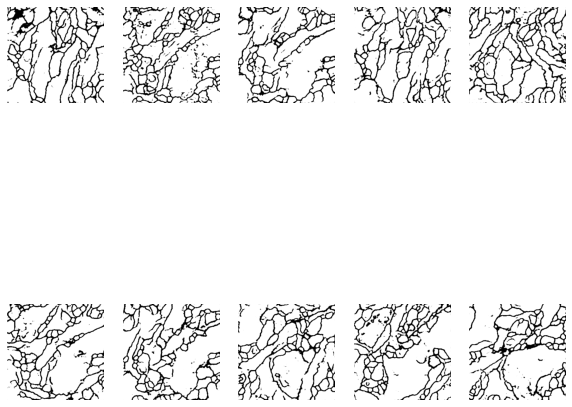

In [24]:
show_images(results, number = 10 )

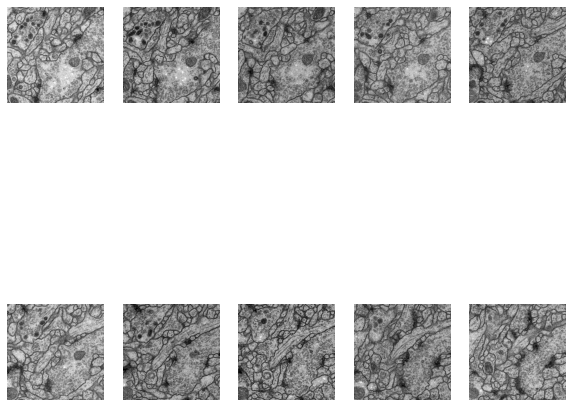

In [17]:
show_images("examples/legacy/data/test", image_suffix="png", number=10)